<a href="https://colab.research.google.com/github/snufka/PythonProject/blob/main/updated%20_probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
%matplotlib inline

#Task 1-------------------------------------------------------------------------
#url= input ("Enter wiki url :")
#for easy testing
url= 'https://de.wikipedia.org/wiki/Pietro_Antonio_Lorenzoni'

def scraping_webpage(url): #web scraping function

    page=requests.get(url)

#getting the text and parsing it
    soup = BeautifulSoup(page.text, 'html.parser')

#The Wiki page Text
    text=[]
    text_body = soup.find_all(class_='mw-body')

    for item in text_body:
         text.append(item.text)
         
#Clean version of the text
    string =' '.join([str(item) for item in text]) 
    return string

my_fun = scraping_webpage(url)
print(my_fun)







Pietro Antonio Lorenzoni

aus Wikipedia, der freien Enzyklopädie



Zur Navigation springen
Zur Suche springen
Pietro Antonio Lorenzoni, auch Peter Anton Lorenzoni (* 25. August 1721 in Cles; † 16. August 1782 in Salzburg) war ein italienischer Maler, der in Salzburg tätig war.

Inhaltsverzeichnis

1 Leben
2 Werke
3 Literatur
4 Weblinks


Leben[Bearbeiten | Quelltext bearbeiten]
Lorenzoni wurde im Trientiner Nonstal als Sohn eins Schmiedes geboren. Er verbrachte einige Zeit in Rom und war später Schüler von Paul Troger. Durch den kunstfördernden Grafen Franz Laktanz von Firmian kam er nach Salzburg, wo er unter Erzbischof Sigismundus Christoph von Schrattenbach Hofmaler wurde. Er bildete den Maler Johann Nepomuk della Croce aus und starb sehr vermögend im 2. Stock des Schlossermeister-Hauses am Mönchsberg. Zu seinen Schülern zählte sein Neffe Johann Baptist Lampi der Ältere.
Lorenzoni war im Erzbistum Salzburg sehr aktiv und fertigte eine Vielzahl von Altarblättern an, viele seine

In [53]:
#Task 2-------------------------------------------------------------------------
def lang_in_url():
    split = url.split(".")

#Checking Language by subDomain;
    if split[0].find("en") == -1:
        print("*********Based on the URL, this page is in German**************")
  # elif (split[0].includes("en"))
   #     print("it's not english nor German, to find out more please visit https://en.wikipedia.org/wiki/List_of_Wikipedias#List")
    else: 
        print("*********Based on the URL, this page is in English*****************")
  
url_lang=lang_in_url()

*********Based on the URL, this page is in German**************


   Letter  Frequency Input 1
0       a                163
1       b                 83
2       c                 48
3       d                 72
4       e                327
5       f                 30
6       g                 62
7       h                 65
8       i                192
9       j                  3
10      k                 44
11      l                121
12      m                 52
13      n                229
14      o                115
15      p                 40
16      q                  4
17      r                219
18      s                138
19      t                167
20      u                 78
21      v                 22
22      w                 20
23      x                  9
24      y                  2
25      z                 48
26      ä                 10
27      ö                  8
28      ü                  9


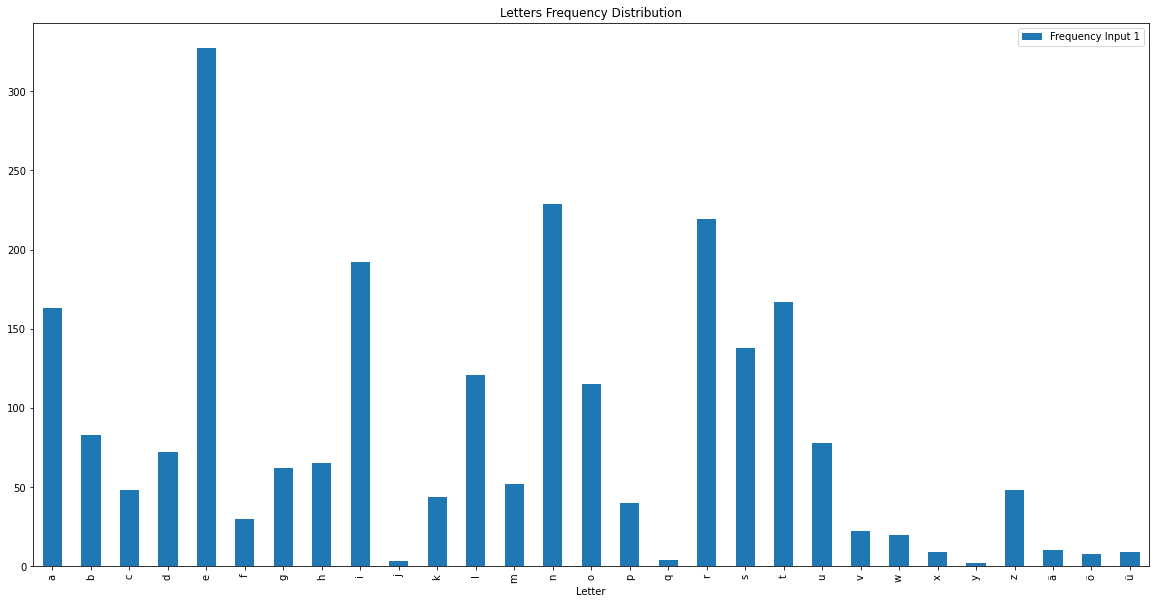

In [43]:
#TASK 3-------------------------------------------------------------------------
#list of only the letters, including german letters
def letters_frequency(my_fun):
     x = re.findall("[A-Za-zÀ-ȕ]", my_fun)

#turn it back to str to count frequency
     clean_str= ''.join([str(elem) for elem in x])

#frequency count
     freq = {} 
     for item in clean_str.lower(): 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1

#sorting dictinory alphabetically
     sortedDict = dict( sorted(freq.items(), key=lambda x: x[0].lower()) )
     return sortedDict

lff=letters_frequency(my_fun)

#the frequency table
df1=pd.DataFrame(lff.items(),columns=['Letter', 'Frequency Input 1'])
print(df1)

#The chart
df_reset=df1.set_index('Letter')
df_reset.plot.bar(figsize=(20,10),title='Letters Frequency Distribution')

   Letter  Frequency Input 1  Frequency Input 2
0       a             4164.0             8124.0
1       b              737.0             2868.0
2       c             1738.0             3196.0
3       d             1673.0             5910.0
4       e             5249.0            19837.0
5       f             1058.0             2207.0
6       g              941.0             3843.0
7       h             1915.0             4518.0
8       i             3671.0             9702.0
9       j              119.0              440.0
10      k              350.0             2644.0
11      l             2063.0             5317.0
12      m             1826.0             4215.0
13      n             3354.0            11345.0
14      o             3774.0             3938.0
15      p             1292.0             1693.0
16      q               60.0               20.0
17      r             3580.0            10475.0
18      s             3243.0             7534.0
19      t             3804.0            

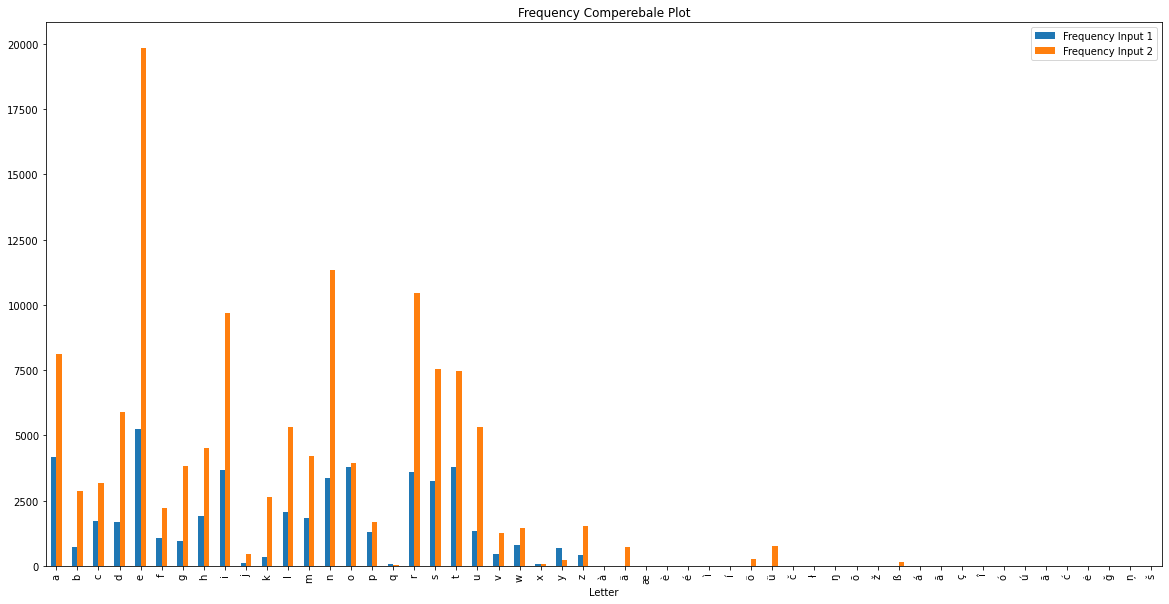

In [56]:
#Task 4 Plooting----------------------------------------------------------

#url_2= input("second link: ")
url_2='https://de.wikipedia.org/wiki/Angela_Merkel'

page_2=requests.get(url_2)
secondtext=scraping_webpage(url_2)
#print(secondtext)

lff_2=letters_frequency(secondtext)
#print(lff_2)

df2=pd.DataFrame(lff_2.items(),columns=['Letter', 'Frequency Input 2'])
#print(df2)

def data_merging_chart():
    merged_table=pd.merge(df1, df2, on='Letter', how='outer')
    print(merged_table)
    df_reset=merged_table.set_index('Letter')
    df_reset.plot.bar(figsize=(20,10), title='Frequency Comperebale Plot')

merged_chart=data_merging_chart()
print(merged_chart)


In [45]:
# Task 5 & 6--------------------------------------------------------------------

def probability_german_text():
#count of letters sum
   values_char = lff.values()
   total_char= sum(values_char)
#print("Total number of letters in the text: {}".format(total_char))

#Counting German Letters and counting the percentage of the letter in the text
   germna_letters= ['ä', 'ö', 'ü', 'ß']
   german_char_dict = {k:lff[k] for k in germna_letters if k in lff}

   values_german_char = german_char_dict.values()
   total_german_char= sum(values_german_char)
   print(total_char) 
   print("Total number of German letter in the text: {}".format(total_german_char))

# Calculation of the % of the German latters of the text
   percentage_of_german_char= (total_german_char*100)/total_char
   round_percentage_of_german_char=round(percentage_of_german_char, 2)

   print("percentage of greman letter in the text: {}".format(round_percentage_of_german_char))
   
   
   #mean = (0.456/100)*total_char
   #sd= (0.114/100)*total_char
   #z= (total_german_char - mean)/sd
   #probability= 1-z
   #print('z', z, 'mean',mean,'sd',sd ,'prob',probability)

#Probablity that the text is in German----------
   if percentage_of_german_char >= 0.91:
      print("We are 100% sure that this text is in German! The frequency of special German characters is {}%!".format(round_percentage_of_german_char))
  
   elif percentage_of_german_char > 0.79 and percentage_of_german_char < 0.91:
        print("The probability that this text is in German is 99.9%! The frequency of special German characters is {}%".format(round_percentage_of_german_char))
  
   elif percentage_of_german_char > 0.68 and percentage_of_german_char <= 0.79:
        print("The probability that this text is in German is 97.7%- 99.8%! The frequency of special German characters is {}%".format(round_percentage_of_german_char))

   elif percentage_of_german_char > 0.58 and percentage_of_german_char <= 0.68:
        print("The probability that this text is in German is 84.1% - 97.7%! The frequency of special German characters is {}%".format(round_percentage_of_german_char))

   elif percentage_of_german_char >= 0.46 and percentage_of_german_char <= 0.57:
        print("The probability that this text is in German is 84.1% - 50.1%! The frequency of special German characters is {}%".format(round_percentage_of_german_char))

   elif percentage_of_german_char < 0.46 and percentage_of_german_char >= 0.34:
    print("The probability that this text is in German is 15.8% - 50%! The frequency of special German characters is {}%".format(round_percentage_of_german_char))

   elif percentage_of_german_char < 0.34 and percentage_of_german_char >= 0.23:
    print("We are 97.7% - 84.2% sure that this text is not German! The frequency of special German characters is {}%".format(round_percentage_of_german_char))

   elif percentage_of_german_char < 0.23 and percentage_of_german_char >= 0.11:
    print("We are 99.8% - 97.8% sure that this text is not German! The frequency of special German characters is {}%".format(round_percentage_of_german_char))

   else: 
    print("Not German! There is less than 0.1% that this text is in German! The frequency of special German characters is {}%".format(round_percentage_of_german_char))

probability_german_text()

2380
Total number of German letter in the text: 27
percentage of greman letter in the text: 1.13
z 5.951348960636886 mean 10.8528 sd 2.7132 prob -4.951348960636886
We are 100% sure that this text is in German! The frequency of special German characters is 1.13%!
